# Deep Learning

# I. Overview

### Objective
Understand deep learning from the context of neural networks using pre-existing libraries to build deep learning models. Deep neural networks typically contain more hidden layers than shallow neural networks.

### Tasks performed
Implemented tensorflow and keras models for performing classification

# II. Data
## Introduction
This is a classification dataset for determining whether the Loan Status of individuals, which is either Fully Paid or Charged Off. It has been taken from Kaggle datasets (https://www.kaggle.com/zaurbegiev/my-dataset) and although the documentation of where is was taken from is scarce, the readability of the features is good.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve

In [2]:
data_classification = pd.read_csv('credit_train.csv', index_col=False)

In [3]:
data_classification.head(2)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0


In [4]:
data_classification.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


There are some null values, removing them should be okay because there are still enough observations....

In [5]:
data_classification.dropna(how="any", inplace=True)

In [6]:
print('T: ', 'Loan Status')
print('Rows: ', len(data_classification))
print('Columns: ', len(data_classification.columns))

T:  Loan Status
Rows:  36423
Columns:  19


Introducing new columns for numeric values of non-numeric data, based on findings from Assign 0.

In [7]:
data_classification['Fully Paid'] = (data_classification['Loan Status'] == 'Fully Paid')
data_classification['Short Term'] = (data_classification['Term'] == 'Short Term')

In [8]:
for col in ['Fully Paid', 'Short Term']:
    data_classification = data_classification.astype({col:'int32'}, copy=False)

Removing string columns that have been converted...

In [9]:
data_classification.drop(columns=['Loan Status', 'Term'], inplace=True)

Renaming columns for better use in code...

In [10]:
for col in data_classification.columns:
    x = col.split()
    y = ''
    for i in x:
        y += i.lower()+'_'
    y = y[:-1]
    data_classification.rename(columns={col:y}, inplace=True)

In [11]:
data_classification.head(2)

,loan_id,customer_id,current_loan_amount,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,fully_paid,short_term
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,99999999.0,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,1,1
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,217646.0,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0,1,1


In [12]:
data_classification.corr()['fully_paid'].sort_values()

credit_score                   -0.467169
number_of_open_accounts        -0.025361
monthly_debt                   -0.016347
tax_liens                      -0.012883
number_of_credit_problems      -0.005907
bankruptcies                    0.003085
maximum_open_credit             0.006955
current_credit_balance          0.008538
months_since_last_delinquent    0.016191
years_of_credit_history         0.030938
annual_income                   0.059817
short_term                      0.105298
current_loan_amount             0.200122
fully_paid                      1.000000
Name: fully_paid, dtype: float64

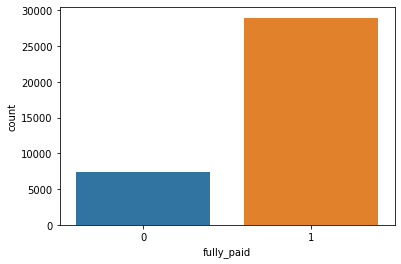

In [13]:
sns.countplot(data_classification['fully_paid']);

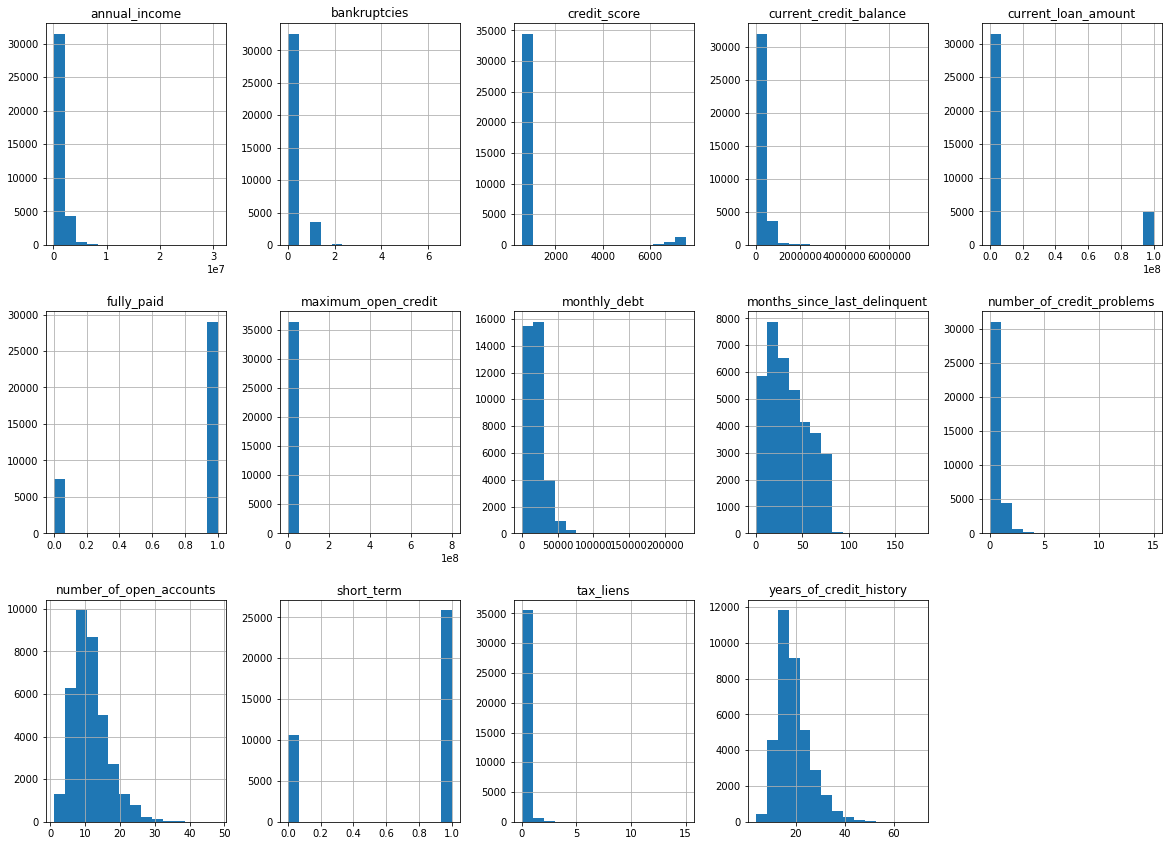

In [14]:
data_classification.select_dtypes(include='number').hist(bins=15, figsize=(20, 20), layout=(4, 5));

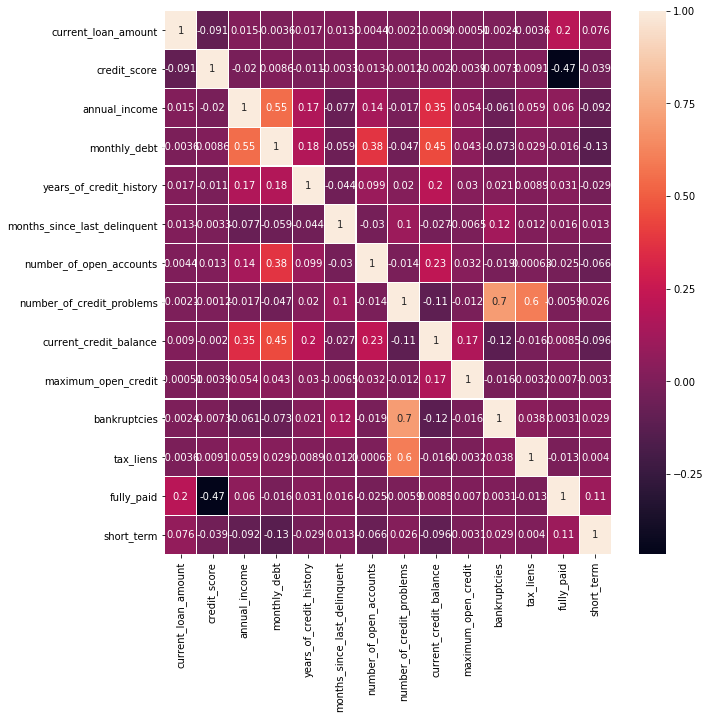

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data_classification.corr(), annot=True, linewidths=.1, ax=ax)
plt.show()

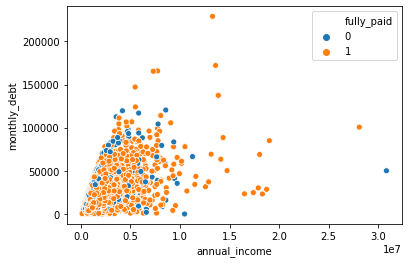

In [16]:
sns.scatterplot(x="annual_income", y="monthly_debt", hue="fully_paid", data=data_classification);

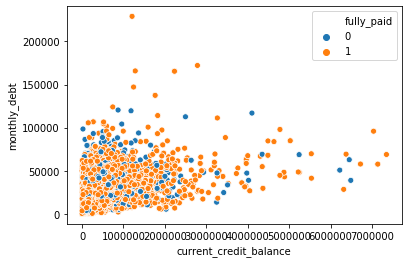

In [17]:
sns.scatterplot(x="current_credit_balance", y="monthly_debt", hue="fully_paid", data=data_classification);

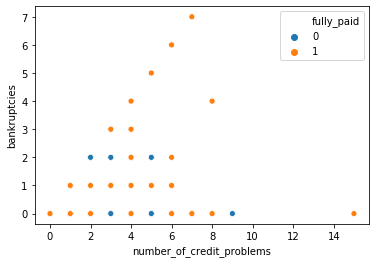

In [18]:
sns.scatterplot(x="number_of_credit_problems", y="bankruptcies", hue="fully_paid", data=data_classification);

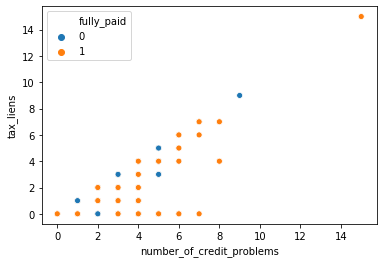

In [19]:
sns.scatterplot(x="number_of_credit_problems", y="tax_liens", hue="fully_paid", data=data_classification);

## Preliminary observations for classification data:
1. The credit score for most of the participants is high. However this seems to have no effect on the ability of paying off the loan. Interpreting this might be an issue, since we actually have more data for fully paid loans.
2. The months since the person was last delinquent does not seem to have an effect on the loan payment.
3. A higher annual income even with a higher monthly debt shows a trend towards better fully paid loans.

# III. Methods

<img src="https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67" width=700 />



## Applying deep feedforward network on real data
### Pre-processing data for use in Tensorflow networks

In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [21]:
data_classification = data_classification[['annual_income', 'bankruptcies', 'credit_score', 'current_credit_balance', \
               'maximum_open_credit', 'monthly_debt', 'months_since_last_delinquent', \
               'number_of_credit_problems', 'number_of_open_accounts', 'tax_liens', \
               'years_of_credit_history', 'current_loan_amount', 'fully_paid']].copy()
data_classification = data_classification.sample(10000)

train, test = train_test_split(data_classification, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

6400 train examples
1600 validation examples
2000 test examples


In [22]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('fully_paid')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [23]:
batch_size = 4 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [24]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of targets:', label_batch )

Every feature: ['annual_income', 'bankruptcies', 'credit_score', 'current_credit_balance', 'maximum_open_credit', 'monthly_debt', 'months_since_last_delinquent', 'number_of_credit_problems', 'number_of_open_accounts', 'tax_liens', 'years_of_credit_history', 'current_loan_amount']
A batch of targets: tf.Tensor([1 1 1 1], shape=(4,), dtype=int32)


In [25]:
feature_columns = []

for header in ['annual_income', 'bankruptcies', 'credit_score', 'current_credit_balance', \
               'maximum_open_credit', 'monthly_debt', 'months_since_last_delinquent', \
               'number_of_credit_problems', 'number_of_open_accounts', 'tax_liens', \
               'years_of_credit_history', 'current_loan_amount']:
  feature_columns.append(feature_column.numeric_column(header))

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

### Deep feed forward network with 5 layers

In [26]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=5)

Epoch 1/5
1600/1600 [==============================] - 10s 6ms/step - loss: 3.1002 - accuracy: 0.7978 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
1600/1600 [==============================] - 5s 3ms/step - loss: 3.0997 - accuracy: 0.7978 - val_loss: 2.9708 - val_accuracy: 0.8062
Epoch 3/5
1600/1600 [==============================] - 5s 3ms/step - loss: 3.0973 - accuracy: 0.7978 - val_loss: 2.9708 - val_accuracy: 0.8062
Epoch 4/5
1600/1600 [==============================] - 5s 3ms/step - loss: 3.0973 - accuracy: 0.7978 - val_loss: 2.9708 - val_accuracy: 0.8062
Epoch 5/5
1600/1600 [==============================] - 5s 3ms/step - loss: 3.1021 - accuracy: 0.7978 - val_loss: 2.9708 - val_accuracy: 0.8062


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_features (DenseFeature multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1664      
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  16512     
_________________________________________________________________
dense_3 (Dense)              multiple                  16512     
_________________________________________________________________
dense_4 (Dense)              multiple                  16512     
_________________________________________________________________
dense_5 (Dense)              multiple                  1

In [28]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

500/500 [==============================] - 1s 2ms/step - loss: 3.2046 - accuracy: 0.7910
Accuracy 0.791


### Explanation of code
I used the tensorflow feature columns to provide inputs to the keras models as defined by tensorflow. I then use the Dense layer definitions to build a deep feedforward network with 5 layers. The last layer is a Dense layer of size 1 for getting the outputs.

The Sequential method defines that the layers are stacked one on top of the other. The Dense layer is a fully connected layer, whose first argument defines its output size, since the input size of the layer is inferred from the preceding layer.
### Result plots

In [29]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

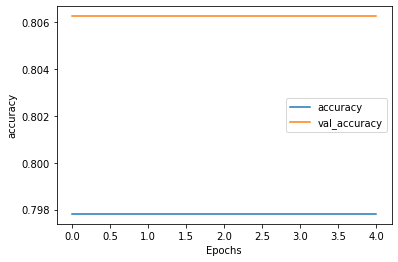

In [30]:
plot_graphs(history, 'accuracy')

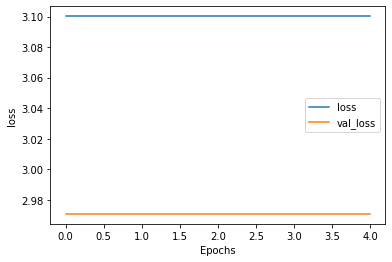

In [31]:
plot_graphs(history, 'loss')

# 3 networks for image classification
## deep feedforward for image classification

In [32]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Data exploration

In [33]:
print('Train data: ', train_images.shape)
print('Train labels: ', len(train_labels))
print('Test data: ', test_images.shape)
print('Test labels: ', len(test_labels))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Train data:  (50000, 32, 32, 3)
Train labels:  50000
Test data:  (10000, 32, 32, 3)
Test labels:  10000


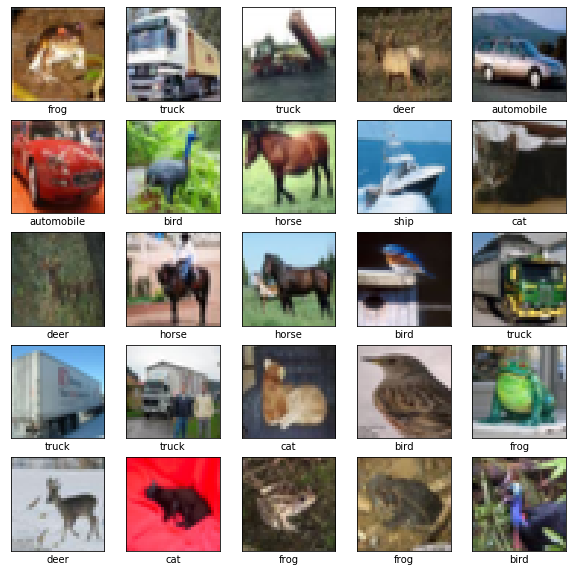

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### 5 layer feedforward model to classify images

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 229us/sample - loss: 1.8893 - accuracy: 0.3041 - val_loss: 1.7737 - val_accuracy: 0.3523
Epoch 2/5
50000/50000 [==============================] - 9s 175us/sample - loss: 1.7256 - accuracy: 0.3730 - val_loss: 1.7156 - val_accuracy: 0.3820
Epoch 3/5
50000/50000 [==============================] - 9s 178us/sample - loss: 1.6608 - accuracy: 0.4015 - val_loss: 1.6008 - val_accuracy: 0.4304
Epoch 4/5
50000/50000 [==============================] - 9s 183us/sample - loss: 1.6219 - accuracy: 0.4150 - val_loss: 1.6314 - val_accuracy: 0.4125
Epoch 5/5
50000/50000 [==============================] - 9s 186us/sample - loss: 1.5962 - accuracy: 0.4245 - val_loss: 1.5584 - val_accuracy: 0.4396


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest loss: ', test_loss)
print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.5774 - accuracy: 0.4396

Test loss:  1.5583942092895509

Test accuracy: 0.4396


### Explanation of codes
The Sequential method defines that the layers are stacked one on top of the other. The Dense layer is a fully connected layer. Every layer's first argument defines its output size, since the input size of the layer is inferred from the preceding layer. The last Dense layer provides the output probabilities for the classes.

### Result visualizations

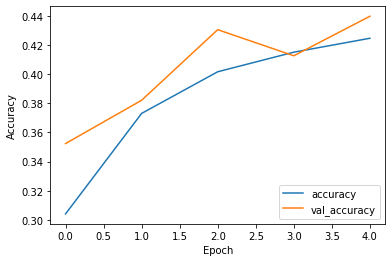

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## deep CNN for image classification

In [39]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.5478 - accuracy: 0.4334 - val_loss: 1.2938 - val_accuracy: 0.5341
Epoch 2/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.1948 - accuracy: 0.5757 - val_loss: 1.1295 - val_accuracy: 0.5963
Epoch 3/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 1.0476 - accuracy: 0.6321 - val_loss: 1.0315 - val_accuracy: 0.6401
Epoch 4/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.9407 - accuracy: 0.6727 - val_loss: 0.9663 - val_accuracy: 0.6636
Epoch 5/5
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.8600 - accuracy: 0.7011 - val_loss: 0.9569 - val_accuracy: 0.6726


In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 2s - loss: 0.8482 - accuracy: 0.6726

Test accuracy: 0.6726


### Explanation of codes
The Sequential method defines that the layers are stacked one on top of the other. The Dense layer is a fully connected layer. Every layer's first argument defines its output size, since the input size of the layer is inferred from the preceding layer. The last Dense layer provides the output probabilities for the classes. The hidden layers consist of convolutional layers and max pooling layers.

### Result visualizations for deep CNN

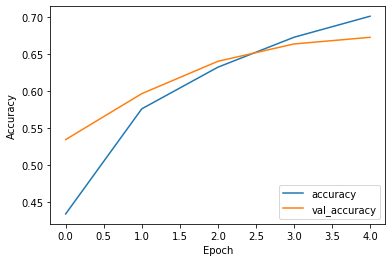

In [42]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## deep CNN with dropout for image classification

In [43]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.5818 - accuracy: 0.4199 - val_loss: 1.2339 - val_accuracy: 0.5641
Epoch 2/5
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.2251 - accuracy: 0.5619 - val_loss: 1.0702 - val_accuracy: 0.6247
Epoch 3/5
50000/50000 [==============================] - 57s 1ms/sample - loss: 1.0947 - accuracy: 0.6159 - val_loss: 0.9647 - val_accuracy: 0.6597
Epoch 4/5
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.0164 - accuracy: 0.6413 - val_loss: 0.9186 - val_accuracy: 0.6770
Epoch 5/5
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9633 - accuracy: 0.6617 - val_loss: 0.8942 - val_accuracy: 0.6953


In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)        

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 3s - loss: 0.7488 - accuracy: 0.6953

Test accuracy: 0.6953


### Explanation of codes
The Sequential method defines that the layers are stacked one on top of the other. The Dense layer is a fully connected layer. Every layer's first argument defines its output size, since the input size of the layer is inferred from the preceding layer. The last Dense layer provides the output probabilities for the classes. The hidden layers consist of convolutional layers and max pooling layers, followed by a dropout factor that helps prevent overfitting by choosing to drop some neurons out of the computation, here it drops out 20% of the neurons.

### Result visualizations for deep CNN with dropout

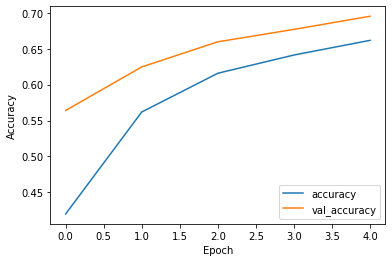

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# IV - Conclusion
## Real world data
Compared to the classification algorithms, the deep feedforward network definitely gives better results for my classification data. The training and validation accuracies are also quite close to each other, meaning there is not much overfitting.

## Experiments on image data
For the image data, the deep CNN with dropout performs the best. The deep CNN without dropout performs second best, and the feedforward network performs alright. The dropout factor prevents overfitting on training data which in turn produces better results while testing. The validation and training loss graphs also reflect this difference between the different architectures.